In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_opening, binary_closing

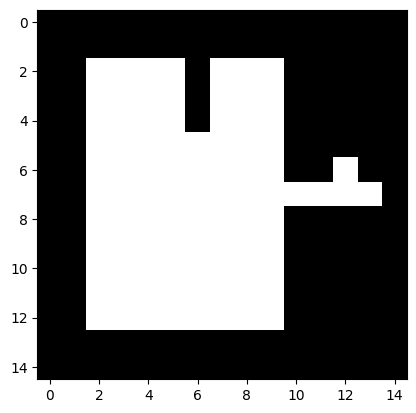

In [2]:
imgset = np.zeros((15,15))
imgset[2:13,2:6] = 1
imgset[2:13,7:10] = 1

imgset[5:13,6] = 1
imgset[7,10:14] = 1

imgset[6:7,12] = 1


plt.imshow(imgset,cmap='gray')

In [14]:
# --- Define structuring elements: square and disk ---
square_selem = np.ones((3, 3))
disk_selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# --- Apply opening and closing (square) ---
opened = binary_opening(imgset, structure=square_selem)
closed = binary_closing(imgset, structure=square_selem)

# --- Apply opening and closing (disk) ---
disk_opened = binary_opening(imgset, structure=disk_selem)
disk_closed = binary_closing(imgset, structure=disk_selem)

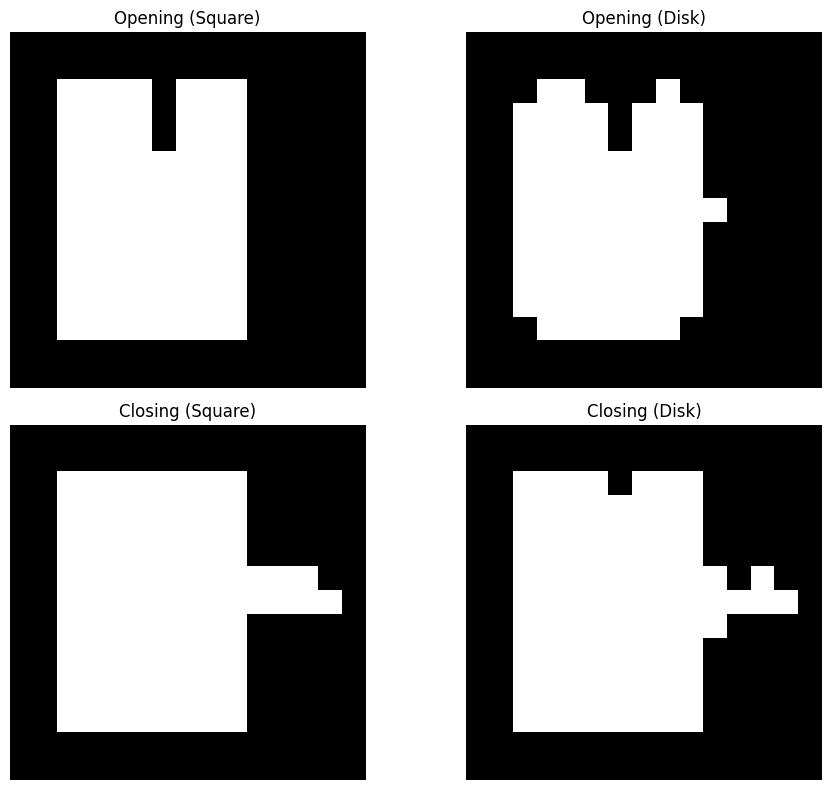

In [15]:
# --- Visualization ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0][0].imshow(opened, cmap='gray')
axs[0][0].set_title('Opening (Square)')

axs[1][0].imshow(closed, cmap='gray')
axs[1][0].set_title('Closing (Square)')

axs[0][1].imshow(disk_opened, cmap='gray')
axs[0][1].set_title('Opening (Disk)')

axs[1][1].imshow(disk_closed, cmap='gray')
axs[1][1].set_title('Closing (Disk)')

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
text_image_path = "./assets/text.png"
brain_image_path = "./assets/brain.png"

text_image = cv2.imread(text_image_path, cv2.IMREAD_GRAYSCALE)
brain_image = cv2.imread(brain_image_path, cv2.IMREAD_GRAYSCALE)


In [17]:
# --- Invert the brain image ---
brain_image_inv = cv2.bitwise_not(brain_image)

# --- Binarize the images (thresholding) ---
_, text_bin = cv2.threshold(text_image, 127, 1, cv2.THRESH_BINARY)
_, brain_bin = cv2.threshold(brain_image_inv, 127, 1, cv2.THRESH_BINARY)

In [18]:
# --- Apply opening and closing for TEXT image ---
text_opened = binary_opening(text_bin, structure=square_selem)
text_closed = binary_closing(text_bin, structure=square_selem)

# --- Apply opening and closing for BRAIN image ---
brain_opened = binary_opening(brain_bin, structure=disk_selem)
brain_closed = binary_closing(brain_bin, structure=disk_selem)

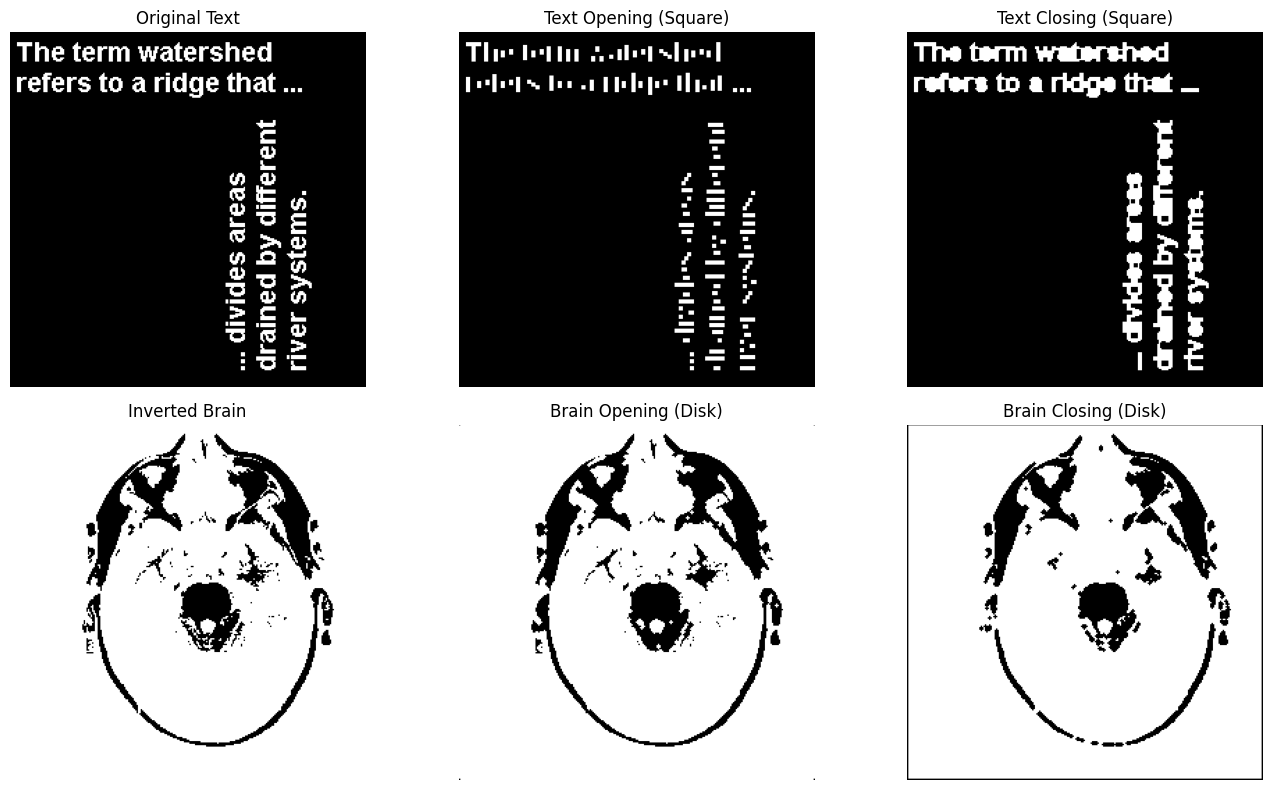

In [19]:
# --- Visualization ---
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# --- Text image results ---
axs[0][0].imshow(text_bin, cmap='gray')
axs[0][0].set_title("Original Text")

axs[0][1].imshow(text_opened, cmap='gray')
axs[0][1].set_title("Text Opening (Square)")

axs[0][2].imshow(text_closed, cmap='gray')
axs[0][2].set_title("Text Closing (Square)")

# --- Brain image results ---
axs[1][0].imshow(brain_bin, cmap='gray')
axs[1][0].set_title("Inverted Brain")

axs[1][1].imshow(brain_opened, cmap='gray')
axs[1][1].set_title("Brain Opening (Disk)")

axs[1][2].imshow(brain_closed, cmap='gray')
axs[1][2].set_title("Brain Closing (Disk)")

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [36]:
melanome_image_path = "./assets/melanome.jpg"
path = "./assets/mri38.png"

melanome_image = cv2.imread(melanome_image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


In [45]:
square = np.ones((4, 4))
disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

In [46]:
# --- Apply dilation and erosion (Square) ---
melanome_dilated_square = cv2.dilate(melanome_image, square, iterations=1)
melanome_eroded_square = cv2.erode(melanome_image, square, iterations=1)

# --- Apply dilation and erosion (Disk) ---
melanome_dilated_disk = cv2.dilate(melanome_image, disk, iterations=1)
melanome_eroded_disk = cv2.erode(melanome_image, disk, iterations=1)

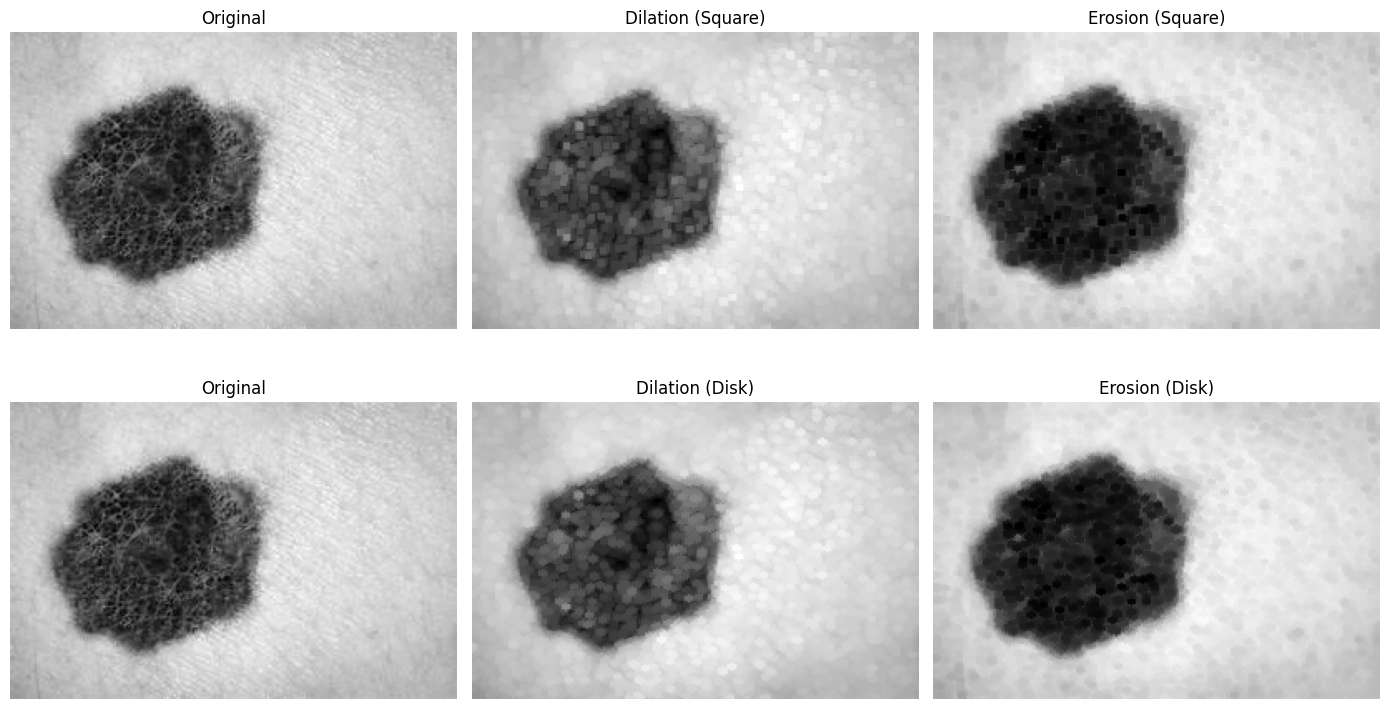

In [47]:
# --- Visualization ---
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

axs[0][0].imshow(melanome_image, cmap='gray')
axs[0][0].set_title('Original')

axs[0][1].imshow(melanome_dilated_square, cmap='gray')
axs[0][1].set_title('Dilation (Square)')

axs[0][2].imshow(melanome_eroded_square, cmap='gray')
axs[0][2].set_title('Erosion (Square)')

axs[1][0].imshow(melanome_image, cmap='gray')
axs[1][0].set_title('Original')

axs[1][1].imshow(melanome_dilated_disk, cmap='gray')
axs[1][1].set_title('Dilation (Disk)')

axs[1][2].imshow(melanome_eroded_disk, cmap='gray')
axs[1][2].set_title('Erosion (Disk)')

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [53]:
# --- Define structuring element ---
selem = np.ones((1,5))

# --- Erosion and Dilation ---
eroded = cv2.erode(melanome_image, selem, iterations=1)
dilated = cv2.dilate(melanome_image, selem, iterations=1)

# --- Morphological Gradients ---
internal_gradient = cv2.subtract(melanome_image, eroded)
external_gradient = cv2.subtract(dilated, melanome_image)
morph_gradient = cv2.subtract(dilated, eroded)

# --- Laplacian operator ---
laplacian = cv2.Laplacian(melanome_image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # convert to 8-bit

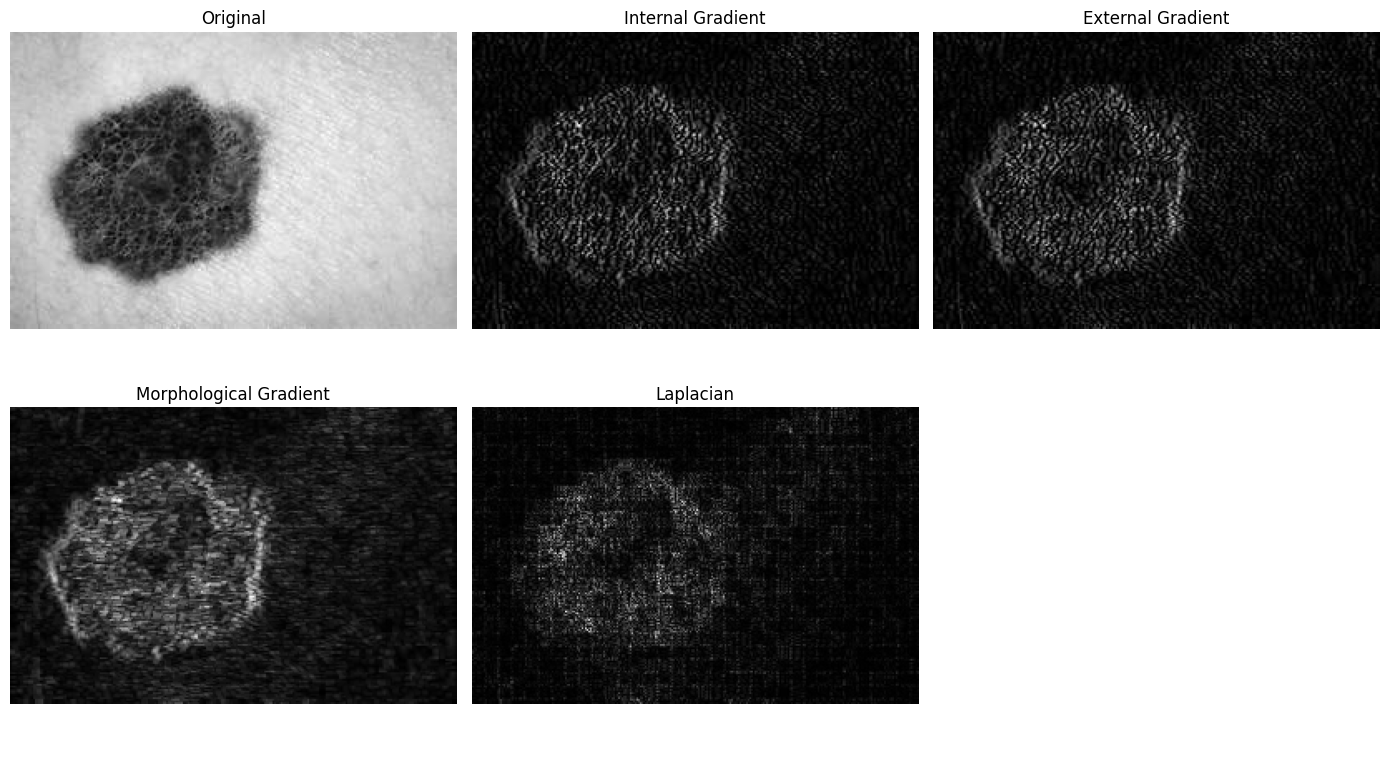

In [54]:
# --- Visualization ---
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

axs[0][0].imshow(melanome_image, cmap='gray')
axs[0][0].set_title('Original')

axs[0][1].imshow(internal_gradient, cmap='gray')
axs[0][1].set_title('Internal Gradient')

axs[0][2].imshow(external_gradient, cmap='gray')
axs[0][2].set_title('External Gradient')

axs[1][0].imshow(morph_gradient, cmap='gray')
axs[1][0].set_title('Morphological Gradient')

axs[1][1].imshow(laplacian, cmap='gray')
axs[1][1].set_title('Laplacian')

axs[1][2].axis('off')

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [55]:
brain2_path = "./assets/images.jfif"

brain2 = cv2.imread(brain2_path, cv2.IMREAD_GRAYSCALE)

In [71]:
# --- Define structuring element ---
selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# --- Erosion and Dilation ---
eroded_brain2 = cv2.erode(brain2, selem, iterations=1)
dilated_brain2 = cv2.dilate(brain2, selem, iterations=1)

# --- Morphological Gradients ---
internal_gradient_brain2 = cv2.subtract(brain2, eroded_brain2)
external_gradient_brain2 = cv2.subtract(dilated_brain2, brain2)
morph_gradient_brain2 = cv2.subtract(dilated_brain2, eroded_brain2)

# --- Laplacian operator ---
laplacian_brain2 = cv2.Laplacian(brain2, cv2.CV_64F)
laplacian_brain2 = cv2.convertScaleAbs(laplacian_brain2)  # convert to 8-bit

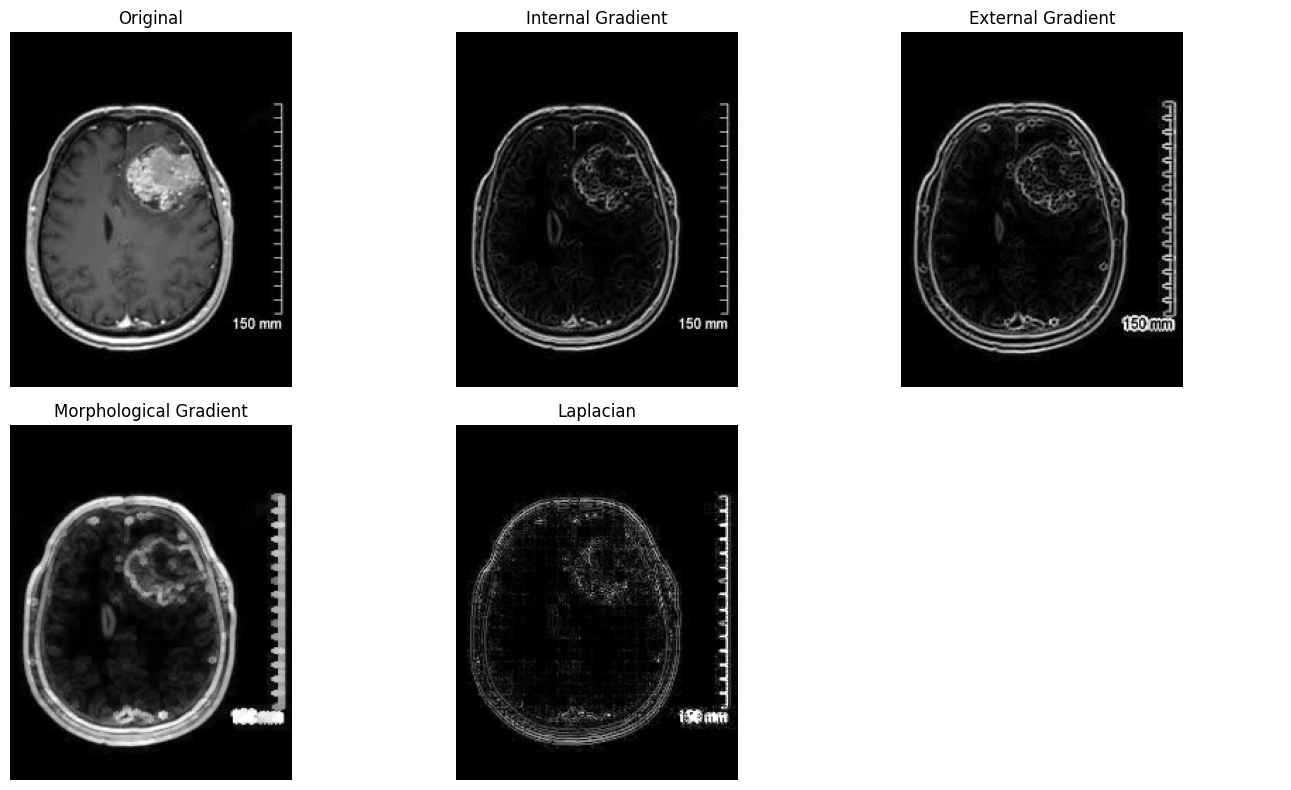

In [72]:
# --- Visualization ---
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

axs[0][0].imshow(brain2, cmap='gray')
axs[0][0].set_title('Original')

axs[0][1].imshow(internal_gradient_brain2, cmap='gray')
axs[0][1].set_title('Internal Gradient')

axs[0][2].imshow(external_gradient_brain2, cmap='gray')
axs[0][2].set_title('External Gradient')

axs[1][0].imshow(morph_gradient_brain2, cmap='gray')
axs[1][0].set_title('Morphological Gradient')

axs[1][1].imshow(laplacian_brain2, cmap='gray')
axs[1][1].set_title('Laplacian')

axs[1][2].axis('off')

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [75]:
brain2_tophat = cv2.morphologyEx(brain2, cv2.MORPH_TOPHAT, selem)


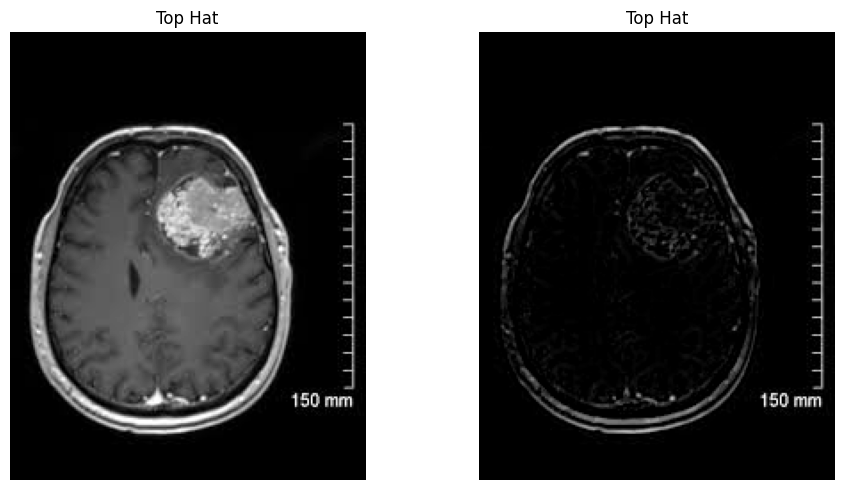

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(brain2, cmap='gray')
axs[0].set_title('Top Hat')

axs[1].imshow(brain2_tophat, cmap='gray')
axs[1].set_title('Top Hat')


for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()